#    **NLI-PT Experiments (all features)**





In [ ]:
import csv
import numpy as np
from numpy import mean
from numpy import std
import pandas as pd
import seaborn as sns
from google.colab import files
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from sklearn import svm
from sklearn import metrics
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

# **Experiments with the data**

In [ ]:
df = pd.read_csv("NLI-PT_all_features_new_noNaN.csv", encoding= 'unicode_escape')

In [ ]:
df.head()

,Text_Title,Cohesive Complexity Feature: Mendes Additive Connectives per Token,Cohesive Complexity Feature: Mendes All Connectives per Token,Cohesive Complexity Feature: Mendes Causal Connectives per Token,Cohesive Complexity Feature: Mendes Concessive Connectives per Token,Cohesive Complexity Feature: Mendes Multi- to Single-Word Connectives,Cohesive Complexity Feature: Mendes Multi-Word Connectives per Connective,Cohesive Complexity Feature: Mendes Other Connectives per Token,Cohesive Complexity Feature: Mendes Single-Word Connectives per Connective,Cohesive Complexity Feature: Mendes Single-Word Connectives per Token,...,Syntactic Complexity Feature: Verb Cluster per Clause,Syntactic Complexity Feature: Verb Cluster per Sentence,Syntactic Complexity Feature: Verb Cluster per T-Unit,Syntactic Complexity Feature: Verb Phrases per Clause,Syntactic Complexity Feature: Verb Phrases per Sentence,Syntactic Complexity Feature: Verb Phrases per T-unit,Syntactic Complexity Feature: WH-Clefts per VP,Syntactic Complexity Feature: e-que Cleft per VP,L1,Proficiency
0,ara_A_006CAETF_cop.txt,0.043165,0.086331,0.00000,0.0,0,0,0,1,0.086331,...,0.300000,0.230769,0.300000,1.000000,0.769231,1.0,0,0.0,1,1
1,ara_A_006CAETI_cop.txt,0.073171,0.186992,0.00813,0.0,0,0,0,1,0.186992,...,0.266667,0.571429,0.285714,0.933333,2.000000,1.0,0,0.0,1,1
2,ara_A_008CVETD_cop.txt,0.100000,0.111111,0.00000,0.0,0,0,0,1,0.111111,...,0.076923,0.200000,0.076923,1.000000,2.600000,1.0,0,0.0,1,1
3,ara_A_008CVETF_cop.txt,0.100529,0.148148,0.00000,0.0,0,0,0,1,0.148148,...,0.074074,0.200000,0.076923,0.962963,2.600000,1.0,0,0.0,1,1
4,ara_A_CA.A2.22.75.3S_pea.txt,0.020833,0.078125,0.00000,0.0,0,0,0,1,0.078125,...,0.076923,0.285714,0.083333,0.923077,3.428571,1.0,0,0.0,1,1


In [ ]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, 445].values

In [ ]:
X = StandardScaler().fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

* **Selection of Best Performing Model**

In [ ]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [ ]:
scores = []
membersProcessed = 0
for model_name, mp in model_params.items():  
  clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
  clf.fit(X_train, y_train)
  scores.append({
      'model': model_name,
      'best_score': clf.best_score_,
      'best_params': clf.best_params_
  })
  membersProcessed += 1
  print (f'Progress: {membersProcessed}/{len(model_params.items())}')
    
results = pd.DataFrame(scores,columns=['model','best_score','best_params'])
results

* **SVM with all features**

In [ ]:
svm_model = SVC(C=10, coef0=0.5, degree=3, gamma='scale', kernel='rbf')
svm_model.fit(X_train, y_train)

SVC(C=10, coef0=0.5)

In [ ]:
predictions = svm_model.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.75      0.78      0.77       250
           2       0.71      0.71      0.71       225
           3       0.44      0.38      0.41        76

    accuracy                           0.70       551
   macro avg       0.63      0.63      0.63       551
weighted avg       0.69      0.70      0.70       551



In [ ]:
print(metrics.confusion_matrix(y_test, predictions))

[[196  46   8]
 [ 36 160  29]
 [ 28  19  29]]


* **Random Forest with all features**

In [ ]:
rf = RandomForestClassifier(max_depth=6, n_estimators=20, random_state=0)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.72      0.77      0.75       250
           2       0.62      0.76      0.69       225
           3       0.88      0.09      0.17        76

    accuracy                           0.68       551
   macro avg       0.74      0.54      0.53       551
weighted avg       0.70      0.68      0.64       551



In [ ]:
print(metrics.confusion_matrix(y_test, predictions))

[[193  57   0]
 [ 52 172   1]
 [ 22  47   7]]


* **Logistic Regression with all features**

In [ ]:
logisticRegr = LogisticRegression(C=0.1, penalty='l2')
logisticRegr.fit(X_train, y_train)

In [ ]:
predictions = logisticRegr.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.76      0.74      0.75       250
           2       0.64      0.72      0.68       225
           3       0.44      0.34      0.39        76

    accuracy                           0.67       551
   macro avg       0.62      0.60      0.60       551
weighted avg       0.67      0.67      0.67       551



In [ ]:
print(metrics.confusion_matrix(y_test, predictions))

[[184  59   7]
 [ 38 161  26]
 [ 19  31  26]]


* **Principal Component Analysis**

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
finalDf = pd.concat([principalDf, df[['Proficiency']]], axis = 1)

In [ ]:
finalDf.head()

,principal component 1,principal component 2,Proficiency
0,-1.881820,-11.867077,1
1,-8.044250,4.631111,1
2,-7.958114,-6.936691,1
3,-4.757305,3.786618,1
4,-0.325580,-1.466896,1


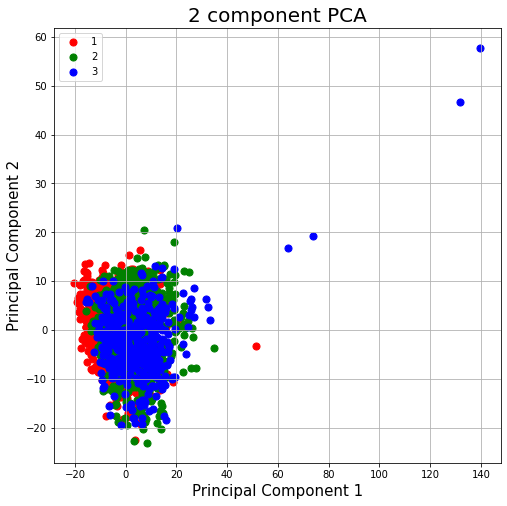

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1, 2, 3]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Proficiency'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

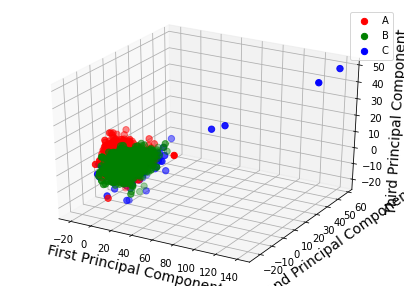

In [ ]:
pca = PCA(n_components=3)
pca.fit(X) 
X_pca = pca.transform(X) 

ex_variance=np.var(X_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
ex_variance_ratio


Xax = X_pca[:,0]
Yax = X_pca[:,1]
Zax = X_pca[:,2]

cdict = {1:'red',2:'green', 3:'blue'}
labl = {1:'A',2:'B', 3:'C'}
marker = {1:'o',2:'o', 3:'o'}

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')

fig.patch.set_facecolor('white')
for l in np.unique(y):
 ix=np.where(y==l)
 ax.scatter(Xax[ix], Yax[ix], Zax[ix], c=cdict[l], s=40,
           label=labl[l], marker=marker[l])
# for loop ends
ax.set_xlabel("First Principal Component", fontsize=14)
ax.set_ylabel("Second Principal Component", fontsize=14)
ax.set_zlabel("Third Principal Component", fontsize=14)

ax.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


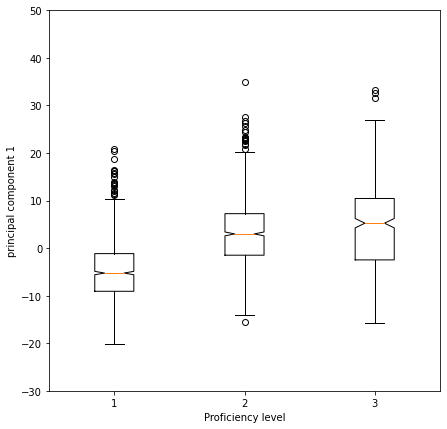

In [ ]:
#Visualize distribution of principal component 1 thoughout proficiency levels
a = finalDf.loc[finalDf['Proficiency'] == 1, 'principal component 1']
b = finalDf.loc[finalDf['Proficiency'] == 2, 'principal component 1']
c = finalDf.loc[finalDf['Proficiency'] == 3, 'principal component 1']
columns = [a, b, c]
plt.rcParams["figure.figsize"] = (7,7)
fig, ax = plt.subplots()
plt.ylim(-30, 50)
plt.ylabel('principal component 1')
plt.xlabel('Proficiency level')
ax.boxplot(columns, notch=True, showfliers=True)
plt.show()

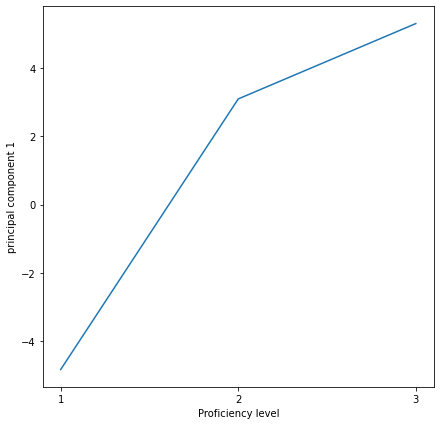

In [ ]:
# Visualize general trend with principal component 1 mean throughout levels
finalDf.groupby(['Proficiency'])['principal component 1'].mean().plot()
plt.ylabel('principal component 1')
plt.xlabel('Proficiency level')
plt.xticks(range(1, 4))
#plt.ylim(-2, 2)
plt.show()

* **Linear Discriminant Analysis**

In [ ]:
model = LinearDiscriminantAnalysis()

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.660 (0.021)


In [ ]:
target_names = (1,2,3)
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

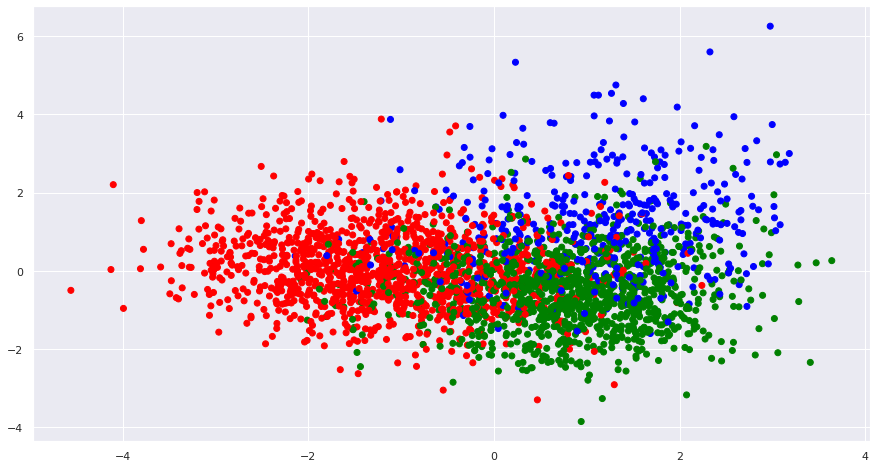

In [ ]:
plt.figure(figsize=(15, 8))
colors = {1:'red', 2:'green', 3:'blue'}
plt.scatter(X_r2[:,0],X_r2[:,1],  c=df['Proficiency'].map(colors))
plt.show()

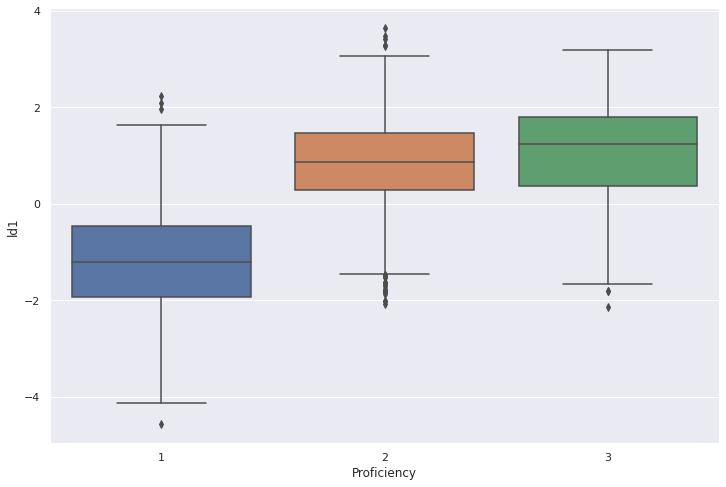

In [ ]:
# Verify LDA distribution throughout levels
df4=pd.DataFrame(zip(X_r2[:,0],X_r2[:,1],y),columns=["ld1","ld2","Proficiency"])

sns.set(rc={'figure.figsize':(12,8)})

#subplot(2,1,1)
sns.boxplot(x='Proficiency', y='ld1', data=df4)
#subplot(2,1,2)
#sns.boxplot(x='Level', y='ld2', data=df)

* ## **Account for Imbalanced Data**

In [ ]:
df['Proficiency'].value_counts()[1]

1193

In [ ]:
df['Proficiency'].value_counts()[2]

1136

In [ ]:
df['Proficiency'].value_counts()[3]

424

* **Balance data by oversampling**

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
over_sampler = RandomOverSampler(random_state=42)
X_res, y_res = over_sampler.fit_resample(X_train, y_train)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({2: 1004, 1: 1004, 3: 1004})
Testing target statistics: Counter({1: 189, 2: 169, 3: 55})


In [ ]:
svm_model.fit(X_res, y_res)

SVC(C=10, coef0=0.5)

In [ ]:
predictions = svm_model.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.76      0.78      0.77       189
           2       0.73      0.72      0.72       169
           3       0.46      0.42      0.44        55

    accuracy                           0.71       413
   macro avg       0.65      0.64      0.64       413
weighted avg       0.71      0.71      0.71       413



* **Balance data by undersampling**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=42)
X_res, y_res = under_sampler.fit_resample(X_train, y_train)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({1: 369, 2: 369, 3: 369})
Testing target statistics: Counter({1: 189, 2: 169, 3: 55})


In [ ]:
svm_model.fit(X_res, y_res)

SVC(C=10, coef0=0.5)

In [ ]:
predictions = svm_model.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.75      0.70      0.73       189
           2       0.68      0.54      0.61       169
           3       0.28      0.53      0.37        55

    accuracy                           0.61       413
   macro avg       0.57      0.59      0.57       413
weighted avg       0.66      0.61      0.63       413



In [ ]:
print(metrics.confusion_matrix(y_test, predictions))

[[132  34  23]
 [ 26  92  51]
 [ 17   9  29]]


* ## **Feature Selection with WEKA**

In [ ]:
# 34 features have been selected by WEKA's CfsSubsetEval
df2 = df[['Cohesive Complexity Feature: Mendes Additive Connectives per Token',
                     'Cohesive Complexity Feature: Mendes Concessive Connectives per Token',
                     'Lexical Richness: Type Token Ratio (10 Segments)',
                     'Lexical Richness: Type Token Ratio (Log10 TTR Verbs)',
                     'Lexical Sophistication Feature: Imageability (AW Type)',
                     'Lexical Sophistication Feature: SUBTLEX Frequency Band 2',
                     'Lexical Sophistication Feature: SUBTLEX Frequency Band 3',
                     'Lexical Sophistication Feature: SUBTLEX Frequency Band 4',
                     'Lexical Sophistication Feature: SUBTLEX Frequency Band 7',
                     'Lexical Sophistication Feature: SUBTLEX Frequency Top 3000',
                     'Lexical Sophistication Feature: SUBTLEX Frequency Top 4000',
                     'Lexical Sophistication Feature: SUBTLEX Frequency Top 6000 and Below',
                     'Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (AW Type)',
                     'Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (FW Type)',
                     'Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (SD AW Token)',
                     'Mean Global Edit Distance for Lemmas',
                     'Morphological Complexity Inflection Feature: First Person per word token',
                     'Morphological Complexity Inflection Feature: Indicatives per Verb',
                     'Morphological Complexity Inflection Feature: Masculine inflection per word token',
                     'Morphological Complexity Inflection Feature: Subjunctives per verb token',
                     'Morphological Complexity Inflection Feature: Subjunctives per word token',
                     'Morphological Complexity Inflection Feature: Third Person per word token',
                     'Number of Morphological Features: Pluperfect Verb per VP',
                     'Number of Morphological Features: Subjunctive Verb per VP',
                     'POS Density Feature: Article',
                     'POS Density Feature: Cardinal Number',
                     'POS Density Feature: Coordinating Conjunction',
                     'POS Density Feature: Determiner',
                     'POS Density Feature: Foreign Word',
                     'POS Density Feature: Interjection',
                     'Referential Cohesion: SD of Global Lexical Overlap (lemma-based)',
                     'Syntactic Complexity Feature: Dependent clauses per T-unit',
                     'Syntactic Complexity Feature: It-Clefts per VP',
                     'Syntactic Complexity Feature: Relative Clauses per Clause',
                     'Proficiency']]

In [ ]:
X = df2.iloc[:, :-1].values
y = df2.iloc[:, 34].values

In [ ]:
X = StandardScaler().fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, shuffle=True)

* **SVM**

In [ ]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
predictions = svm_model.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.76      0.79      0.77       250
           2       0.62      0.80      0.70       225
           3       0.00      0.00      0.00        76

    accuracy                           0.69       551
   macro avg       0.46      0.53      0.49       551
weighted avg       0.60      0.69      0.64       551



In [ ]:
print(metrics.confusion_matrix(y_test, predictions))

[[197  52   1]
 [ 44 181   0]
 [ 18  58   0]]


* **Random Forest**

In [ ]:
rf = RandomForestClassifier(n_estimators=20, random_state=0)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.74      0.77      0.76       250
           2       0.61      0.72      0.66       225
           3       0.36      0.11      0.16        76

    accuracy                           0.66       551
   macro avg       0.57      0.53      0.53       551
weighted avg       0.63      0.66      0.64       551



* **Logistic Regression**

In [ ]:
logisticRegr = LogisticRegression(C=0.1, penalty='l2')
logisticRegr.fit(X_train, y_train)

LogisticRegression(C=0.1)

In [ ]:
predictions = logisticRegr.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.76      0.76      0.76       250
           2       0.62      0.76      0.68       225
           3       0.43      0.13      0.20        76

    accuracy                           0.68       551
   macro avg       0.60      0.55      0.55       551
weighted avg       0.66      0.68      0.65       551



* **PCA with Selected Features**

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
finalDf = pd.concat([principalDf, df[['Proficiency']]], axis = 1)

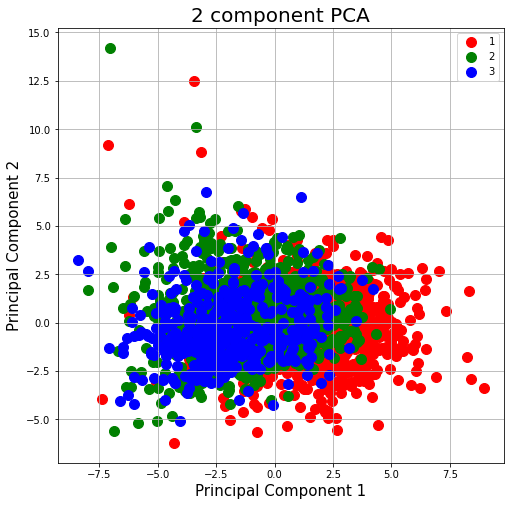

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1, 2, 3]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Proficiency'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 100)
ax.legend(targets)
ax.grid()

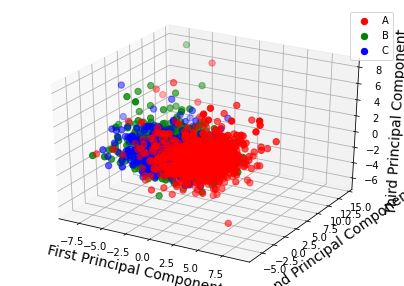

In [ ]:
pca = PCA(n_components=3)
pca.fit(X) 
X_pca = pca.transform(X) 

ex_variance=np.var(X_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
ex_variance_ratio


Xax = X_pca[:,0]
Yax = X_pca[:,1]
Zax = X_pca[:,2]

cdict = {1:'red',2:'green', 3:'blue'}
labl = {1:'A',2:'B', 3:'C'}
marker = {1:'o',2:'o', 3:'o'}

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')

fig.patch.set_facecolor('white')
for l in np.unique(y):
 ix=np.where(y==l)
 ax.scatter(Xax[ix], Yax[ix], Zax[ix], c=cdict[l], s=40,
           label=labl[l], marker=marker[l])
# for loop ends
ax.set_xlabel("First Principal Component", fontsize=14)
ax.set_ylabel("Second Principal Component", fontsize=14)
ax.set_zlabel("Third Principal Component", fontsize=14)

ax.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


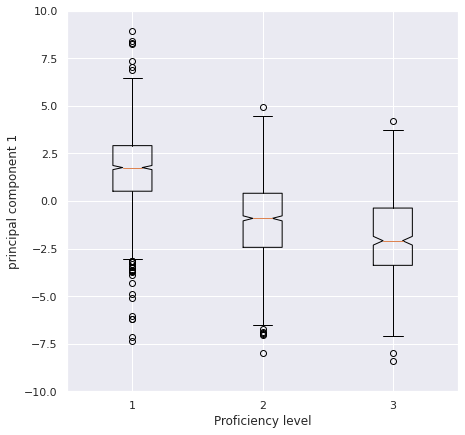

In [ ]:
# Check  distribution of principal component 1 throughout levels
a = finalDf.loc[finalDf['Proficiency'] == 1, 'principal component 1']
b = finalDf.loc[finalDf['Proficiency'] == 2, 'principal component 1']
c = finalDf.loc[finalDf['Proficiency'] == 3, 'principal component 1']
columns = [a, b, c]
plt.rcParams["figure.figsize"] = (7,7)
fig, ax = plt.subplots()
plt.ylim(-10, 10)
plt.ylabel('principal component 1')
plt.xlabel('Proficiency level')
ax.boxplot(columns, notch=True, showfliers=True)
plt.show()

* **LDA with Selected Features**

In [ ]:
model = LinearDiscriminantAnalysis()

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.664 (0.018)


In [ ]:
target_names = (1,2,3,4)
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

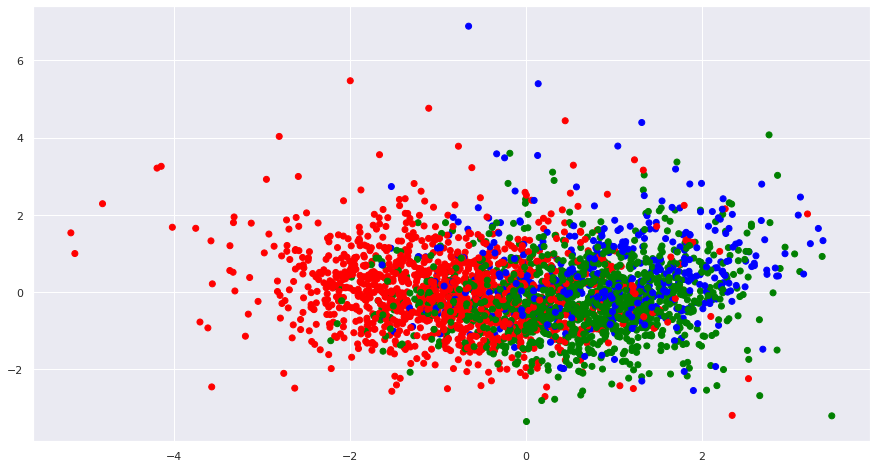

In [ ]:
#Plot LDA
plt.figure(figsize=(15, 8))
colors = {1:'red', 2:'green', 3:'blue'}
plt.scatter(X_r2[:,0],X_r2[:,1],  c=df['Proficiency'].map(colors))
plt.show()

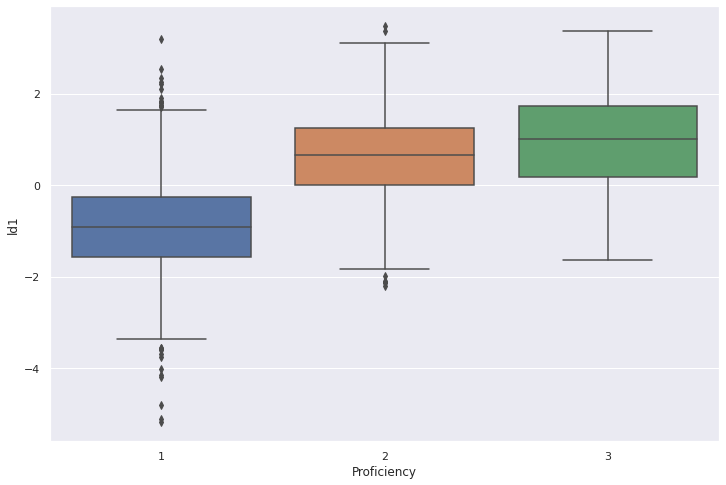

In [ ]:
# Verify LDA distribution throughout levels
df4=pd.DataFrame(zip(X_r2[:,0],X_r2[:,1],y),columns=["ld1","ld2","Proficiency"])

sns.set(rc={'figure.figsize':(12,8)})

#subplot(2,1,1)
sns.boxplot(x='Proficiency', y='ld1', data=df4)
#subplot(2,1,2)
#sns.boxplot(x='Level', y='ld2', data=df)

#**Experiments with Surface Features**

In [ ]:
surface_df=df[['Number Of Letters',
'Number of Sentences',
'Number of Tokens',
'Number of Unique Words',
'Number of syllables',
'Number of Tokens with More Than 2 Syllables', 
'Mean Sentence Length in Letters',
'Mean Sentence Length in Syllables',
'Mean Sentence Length in Tokens', 
'Number of Word Tokens (excluding punctuation and numbers)',
'Number of Word Tokens (including Punctuation and Numbers)',
'Number of Word Types',
'Number of Word Types (excluding Punctuation and numbers)',
'Number of Word Types (including Punctuation and Numbers)',
'Number of Word Types with More Than 2 Syllables', 
'Percentage of Tokens with More Than 2 Syllables',
'Percentage of Word Types with More Than 2 Syllables',
'Proficiency']]

In [ ]:
X = surface_df.iloc[:, :-1].values
y = surface_df.iloc[:, 17].values

In [ ]:
X = StandardScaler().fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

* **SVM**

In [ ]:
svm_model = SVC(C=10, coef0=0.5, degree=3, gamma='scale', kernel='rbf')
svm_model.fit(X_train, y_train)

SVC(C=10, coef0=0.5)

In [ ]:
predictions = svm_model.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.66      0.76      0.71       250
           2       0.59      0.68      0.63       225
           3       0.86      0.08      0.14        76

    accuracy                           0.63       551
   macro avg       0.70      0.51      0.50       551
weighted avg       0.66      0.63      0.60       551



In [ ]:
print(metrics.confusion_matrix(y_test, predictions))

[[190  60   0]
 [ 71 153   1]
 [ 25  45   6]]


* **Random Forest**

In [ ]:
rf = RandomForestClassifier(n_estimators=20, random_state=0)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.67      0.72      0.69       250
           2       0.56      0.64      0.60       225
           3       0.35      0.12      0.18        76

    accuracy                           0.60       551
   macro avg       0.53      0.49      0.49       551
weighted avg       0.58      0.60      0.58       551



* **Logistic Regression**

In [ ]:
logisticRegr = LogisticRegression(C=0.1, penalty='l2')
logisticRegr.fit(X_train, y_train)

LogisticRegression(C=0.1)

In [ ]:
predictions = logisticRegr.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.66      0.73      0.69       250
           2       0.56      0.68      0.62       225
           3       1.00      0.01      0.03        76

    accuracy                           0.61       551
   macro avg       0.74      0.48      0.45       551
weighted avg       0.67      0.61      0.57       551



#**Experiments with Morphosyntactic Features**

In [ ]:
morphosyntactic_df = df[['Number of Syntactic Constituents: Clausal Subject','Number of Syntactic Constituents: Clausal Complement','Number of Syntactic Constituents: Clauses','Number of Syntactic Constituents: Complex Noun Phrase','Number of Syntactic Constituents: Complex T-units','Number of Syntactic Constituents: Coordinate Phrases','Number of Syntactic Constituents: Dependent Clauses',
'Number of Syntactic Constituents: Inverted Pseudoclefts','Number of Syntactic Constituents: It-Clefts','Number of Syntactic Constituents: Noun Phrase','Number of Syntactic Constituents: Open Clausal Complement','Number of Syntactic Constituents: Passive Sentences','Number of Syntactic Constituents: Postnominal Noun Modifier','Number of Syntactic Constituents: Prenominal Noun Modifier','Number of Syntactic Constituents: e-que Clefts',
'Number of Syntactic Constituents: Prepositional Phrase','Number of Syntactic Constituents: Pseudoclefts','Number of Syntactic Constituents: Relative Clauses','Number of Syntactic Constituents: Sentences','Number of Syntactic Constituents: Subordinate Clauses','Number of Syntactic Constituents: T-units','Number of Syntactic Constituents: Verb Cluster','Number of Syntactic Constituents: Verb Phrase','Number of Syntactic Constituents: WH-Clefts',
'Dependency Locality Theory: High Adjacent IC at Finite Verb (higher verb weight)', 'Dependency Locality Theory: High Adjacent IC at Finite Verb (less coordination weight + added verb weight)', 'Dependency Locality Theory: High Adjacent IC at Finite Verb (less coordination weight)', 'Dependency Locality Theory: High Adjacent IC at Finite Verb (no modifier weight + less coordination weight + added verb weight)', 'Dependency Locality Theory: High Adjacent IC at Finite Verb (no modifier weight + less coordination weight)',
'Dependency Locality Theory: High Adjacent IC at Finite Verb (no modifier weight)','Dependency Locality Theory: High Adjacent IC at Finite Verb (original cost configuration)','Dependency Locality Theory: Maximal IC at Finite Verb (higher verb weight)','Dependency Locality Theory: Maximal IC at Finite Verb (less coordination weight + higher verb weight)','Dependency Locality Theory: Maximal IC at Finite Verb (less coordination weight)',
'Dependency Locality Theory: Maximal IC at Finite Verb (no modifier weight + less coordination weight + added verb weight)','Dependency Locality Theory: Maximal IC at Finite Verb (no modifier weight + less coordination weight)','Dependency Locality Theory: Maximal IC at Finite Verb (no modifier weight)','Dependency Locality Theory: Maximal IC at Finite Verb (original cost configuration)', 'Dependency Locality Theory: Total IC at Finite Verb (higher verb weight)',
'Dependency Locality Theory: Total IC at Finite Verb (less coordination weight + higher verb weight)','Dependency Locality Theory: Total IC at Finite Verb (less coordination weight)','Dependency Locality Theory: Total IC at Finite Verb (no modifier weight + less coordination weight + added verb weight)','Dependency Locality Theory: Total IC at Finite Verb (no modifier weight + less coordination weight)','Dependency Locality Theory: Total IC at Finite Verb (no modifier weight)','Dependency Locality Theory: Total IC at Finite Verb (original cost configuration)',
'Morphological Complexity Inflection Feature: Any Person per word token','Morphological Complexity Inflection Feature: Dative Case per Token','Morphological Complexity Inflection Feature: Feminine inflection per word token','Morphological Complexity Inflection Feature: First Person per word token','Morphological Complexity Inflection Feature: Gender inflection per word token','Morphological Complexity Inflection Feature: Imperatives per Verb','Morphological Complexity Inflection Feature: Imperatives per word token',
'Morphological Complexity Inflection Feature: Imperfect tense per verb token','Morphological Complexity Inflection Feature: Indicatives per Verb','Morphological Complexity Inflection Feature: Indicatives per word token','Morphological Complexity Inflection Feature: Infinite Verb Density','Morphological Complexity Inflection Feature: Masculine inflection per word token','Morphological Complexity Inflection Feature: Number per word token',
'Morphological Complexity Inflection Feature: Past Participle Verb Density','Morphological Complexity Inflection Feature: Past tense per verb token','Morphological Complexity Inflection Feature: Second Person per word token','Morphological Complexity Inflection Feature: Singular per word token','Morphological Complexity Inflection Feature: Subjunctives per verb token','Morphological Complexity Inflection Feature: Subjunctives per word token','Morphological Complexity Inflection Feature: Third Person per word token','Number of Morphological Features: Conditional Verb per VP',
'Number of Morphological Features: Imperfect Verb per VP','Number of Morphological Features: Indefinite Pronouns','Number of Morphological Features: Inflected Infinitive Verb per VP','Number of Morphological Features: Pluperfect Verb per VP','Number of Morphological Features: Present Subjunctive Verb per VP','Number of Morphological Features: Preterite Verb per VP','Number of Morphological Features: Relative Pronouns','Number of Morphological Features: Simple Future Verb per VP',
'Number of Morphological Features: Subjunctive Verb per VP','Syntactic Complexity Feature: Complex Nominals per Clause','Syntactic Complexity Feature: Complex Nominals per Sentence','Syntactic Complexity Feature: Complex Nominals per T-unit','Syntactic Complexity Feature: Complex T-unit Ratio','Syntactic Complexity Feature: Complex T-unit per Sentence','Syntactic Complexity Feature: Coordinate Phrases per Clause','Syntactic Complexity Feature: Coordinate Phrases per Sentence','Syntactic Complexity Feature: Coordinate Phrases per T-unit',
'Syntactic Complexity Feature: Dependent clause ratio','Syntactic Complexity Feature: Dependent clauses per Sentence','Syntactic Complexity Feature: Dependent clauses per T-unit','Syntactic Complexity Feature: Inverted Pseudoclefts per VP','Syntactic Complexity Feature: It-Clefts per VP','Syntactic Complexity Feature: Mean Length of Clause','Syntactic Complexity Feature: Mean Length of Complex T-unit','Syntactic Complexity Feature: Mean Length of Noun Phrase','Syntactic Complexity Feature: Mean Length of Prepositional Phrase',
'Syntactic Complexity Feature: Mean Length of T-unit','Syntactic Complexity Feature: Mean Length of Verb Cluster','Syntactic Complexity Feature: Noun Phrases per Clause','Syntactic Complexity Feature: Noun Phrases per Sentence','Syntactic Complexity Feature: Noun Phrases per T-unit','Syntactic Complexity Feature: Postnominal Modifier per Complex Noun Phrase','Syntactic Complexity Feature: Prenominal Modifier per Complex Noun Phrase','Syntactic Complexity Feature: Prepositional Phrases per Clause','Syntactic Complexity Feature: Prepositional Phrases per Sentence',
'Syntactic Complexity Feature: Prepositional Phrases per T-Unit','Syntactic Complexity Feature: Pseudoclefts per VP','Syntactic Complexity Feature: Relative Clauses per Clause','Syntactic Complexity Feature: Relative Clauses per Sentence','Syntactic Complexity Feature: Relative Clauses per T-Unit','Syntactic Complexity Feature: Sentence Complexity Ratio','Syntactic Complexity Feature: Sentence Coordination Ratio','Syntactic Complexity Feature: T-unit complexity ratio','Syntactic Complexity Feature: Verb Cluster per Clause',
'Syntactic Complexity Feature: Verb Cluster per Sentence','Syntactic Complexity Feature: Verb Cluster per T-Unit','Syntactic Complexity Feature: Verb Phrases per Clause','Syntactic Complexity Feature: Verb Phrases per Sentence','Proficiency']]

In [ ]:
X = morphosyntactic_df.iloc[:, :-1].values
y = morphosyntactic_df.iloc[:, 114].values

In [ ]:
X = StandardScaler().fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

* **SVM**

In [ ]:
svm_model = SVC(C=10, coef0=0.5, degree=3, gamma='scale', kernel='rbf')
svm_model.fit(X_train, y_train)

SVC(C=10, coef0=0.5)

In [ ]:
predictions = svm_model.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.72      0.73      0.73       250
           2       0.60      0.67      0.63       225
           3       0.39      0.25      0.30        76

    accuracy                           0.64       551
   macro avg       0.57      0.55      0.55       551
weighted avg       0.63      0.64      0.63       551



In [ ]:
print(metrics.confusion_matrix(y_test, predictions))

[[183  61   6]
 [ 51 150  24]
 [ 20  37  19]]


* **Random Forest**

In [ ]:
rf = RandomForestClassifier(n_estimators=20, random_state=0)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.69      0.79      0.74       250
           2       0.63      0.68      0.65       225
           3       0.37      0.09      0.15        76

    accuracy                           0.65       551
   macro avg       0.56      0.52      0.51       551
weighted avg       0.62      0.65      0.62       551



* **Logistic Regression**

In [ ]:
logisticRegr = LogisticRegression(C=0.01, penalty='l2')
logisticRegr.fit(X_train, y_train)

LogisticRegression(C=0.01)

In [ ]:
predictions = logisticRegr.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.75      0.79      0.77       250
           2       0.62      0.75      0.68       225
           3       0.24      0.05      0.09        76

    accuracy                           0.67       551
   macro avg       0.54      0.53      0.51       551
weighted avg       0.63      0.67      0.64       551



# **Experiments with Lexical Features**

In [ ]:
lexical_df=df[['Lexical Density Feature: Lexical Words per Word','Lexical Richness: MTLD (excluding punctuation and numbers)','Lexical Richness: Type Token Ratio (10 Segments)','Lexical Richness: Type Token Ratio (Corrected TTR Adjectives)','Lexical Richness: Type Token Ratio (Corrected TTR Adverbs)','Lexical Richness: Type Token Ratio (Corrected TTR Lexical Words)','Lexical Richness: Type Token Ratio (Corrected TTR Nouns)','Lexical Richness: Type Token Ratio (Corrected TTR Verbs)','Lexical Richness: Type Token Ratio (Corrected TTR Words)','Lexical Richness: Type Token Ratio (Corrected TTR)','Lexical Richness: Type Token Ratio (Log TTR)','Lexical Richness: Type Token Ratio (Log10 TTR Adjectives)','Lexical Richness: Type Token Ratio (Log10 TTR Adverbs)','Lexical Richness: Type Token Ratio (Log10 TTR Lexical Words)',
'Lexical Richness: Type Token Ratio (Log10 TTR Nouns)','Lexical Richness: Type Token Ratio (Log10 TTR Verbs)','Lexical Richness: Type Token Ratio (Log10 TTR Words)','Lexical Richness: Type Token Ratio (Log10 TTR)','Lexical Richness: Type Token Ratio (Root TTR Adjectives)','Lexical Richness: Type Token Ratio (Root TTR Adverbs)','Lexical Richness: Type Token Ratio (Root TTR Lexical Words)','Lexical Richness: Type Token Ratio (Root TTR Nouns)','Lexical Richness: Type Token Ratio (Root TTR Verbs)','Lexical Richness: Type Token Ratio (Root TTR Words)','Lexical Richness: Type Token Ratio (Root TTR)','Lexical Richness: Type Token Ratio (STTR Adjectives)','Lexical Richness: Type Token Ratio (STTR Adverbs)','Lexical Richness: Type Token Ratio (STTR Lexical Words)','Lexical Richness: Type Token Ratio (STTR Nouns)',
'Lexical Richness: Type Token Ratio (STTR Verbs)','Lexical Richness: Type Token Ratio (STTR Words)','Lexical Richness: Type Token Ratio (STTR)','Lexical Richness: Type Token Ratio (Segments of Length 50)','Lexical Richness: Type Token Ratio (TTR Adjectives and Adverbs per Lexical Types)','Lexical Richness: Type Token Ratio (TTR Adjectives per Lexical Types)','Lexical Richness: Type Token Ratio (TTR Adjectives)','Lexical Richness: Type Token Ratio (TTR Adverbs per Lexical Types)','Lexical Richness: Type Token Ratio (TTR Adverbs)','Lexical Richness: Type Token Ratio (TTR Lexical Words)','Lexical Richness: Type Token Ratio (TTR Nouns per Lexical Types)','Lexical Richness: Type Token Ratio (TTR Nouns)','Lexical Richness: Type Token Ratio (TTR Verbs incl. modals per Lexical Types)',
'Lexical Richness: Type Token Ratio (TTR Verbs incl. modals)','Lexical Richness: Type Token Ratio (TTR Words)','Lexical Richness: Type Token Ratio (TTR)','Lexical Richness: Type Token Ratio (Uber)','Lexical Richness: Type Token Ratio (Uber10)','Lexical Sophistication Feature: Age of Acquisition (AW Token)','Lexical Sophistication Feature: Age of Acquisition (LW Token)','Lexical Sophistication Feature: Age of Acquisition (LW Type)','Lexical Sophistication Feature: Concreteness (AW Token)','Lexical Sophistication Feature: Concreteness (AW Type)','Lexical Sophistication Feature: Concreteness (FW Token)','Lexical Sophistication Feature: Concreteness (LW Token)','Lexical Sophistication Feature: Concreteness (LW Type)','Lexical Sophistication Feature: SUBTLEX Logarithmic Contextual Diversity (SD N Type)','Lexical Sophistication Feature: SUBTLEX Logarithmic Contextual Diversity (SD V Token)',
'Lexical Sophistication Feature: Familiarity (AW Token)','Lexical Sophistication Feature: Familiarity (AW Type)','Lexical Sophistication Feature: Familiarity (LW Token)','Lexical Sophistication Feature: Familiarity (LW Type)','Lexical Sophistication Feature: Imageability (AW Token)','Lexical Sophistication Feature: Imageability (AW Type)','Lexical Sophistication Feature: Imageability (LW Token)','Lexical Sophistication Feature: Imageability (LW Type)','Lexical Sophistication Feature: SUBTLEX Contextual Diversity (AW Token)','Lexical Sophistication Feature: SUBTLEX Contextual Diversity (AW Type)','Lexical Sophistication Feature: SUBTLEX Contextual Diversity (Adj Token)','Lexical Sophistication Feature: SUBTLEX Contextual Diversity (Adj Type)','Lexical Sophistication Feature: SUBTLEX Logarithmic Contextual Diversity (SD V Type)','Lexical Sophistication Feature: SUBTLEX Logarithmic Contextual Diversity (V Token)',
'Lexical Sophistication Feature: SUBTLEX Contextual Diversity (Adv Token)','Lexical Sophistication Feature: SUBTLEX Contextual Diversity (Adv Type)','Lexical Sophistication Feature: SUBTLEX Contextual Diversity (FW Token)','Lexical Sophistication Feature: SUBTLEX Contextual Diversity (FW Type)','Lexical Sophistication Feature: SUBTLEX Contextual Diversity (LW Token)','Lexical Sophistication Feature: SUBTLEX Contextual Diversity (LW Type)','Lexical Sophistication Feature: SUBTLEX Contextual Diversity (N Token)','Lexical Sophistication Feature: SUBTLEX Contextual Diversity (N Type)','Lexical Sophistication Feature: SUBTLEX Contextual Diversity (SD AW Token)','Lexical Sophistication Feature: SUBTLEX Contextual Diversity (SD AW Type)','Lexical Sophistication Feature: SUBTLEX Contextual Diversity (SD Adj Token)','Lexical Sophistication Feature: SUBTLEX Contextual Diversity (SD Adj Type)',
'Lexical Sophistication Feature: SUBTLEX Contextual Diversity (SD Adv Token)','Lexical Sophistication Feature: SUBTLEX Contextual Diversity (SD Adv Type)','Lexical Sophistication Feature: SUBTLEX Contextual Diversity (SD FW Token)','Lexical Sophistication Feature: SUBTLEX Contextual Diversity (SD FW Type)','Lexical Sophistication Feature: SUBTLEX Contextual Diversity (SD LW Token)','Lexical Sophistication Feature: SUBTLEX Contextual Diversity (SD LW Type)','Lexical Sophistication Feature: SUBTLEX Contextual Diversity (SD N Token)','Lexical Sophistication Feature: SUBTLEX Contextual Diversity (SD N Type)','Lexical Sophistication Feature: SUBTLEX Contextual Diversity (SD V Token)','Lexical Sophistication Feature: SUBTLEX Contextual Diversity (SD V Type)','Lexical Sophistication Feature: SUBTLEX Contextual Diversity (V Token)','Lexical Sophistication Feature: SUBTLEX Contextual Diversity (V Type)',
'Lexical Sophistication Feature: SUBTLEX Frequency Band 1','Lexical Sophistication Feature: SUBTLEX Frequency Band 2','Lexical Sophistication Feature: SUBTLEX Frequency Band 3','Lexical Sophistication Feature: SUBTLEX Frequency Band 4','Lexical Sophistication Feature: SUBTLEX Frequency Band 5','Lexical Sophistication Feature: SUBTLEX Frequency Band 6','Lexical Sophistication Feature: SUBTLEX Frequency Band 7','Lexical Sophistication Feature: SUBTLEX Frequency Top 1000','Lexical Sophistication Feature: SUBTLEX Frequency Top 2000','Lexical Sophistication Feature: SUBTLEX Frequency Top 3000','Lexical Sophistication Feature: SUBTLEX Frequency Top 4000','Lexical Sophistication Feature: SUBTLEX Frequency Top 5000','Lexical Sophistication Feature: SUBTLEX Frequency Top 6000 and Below','Lexical Sophistication Feature: SUBTLEX Logarithmic Contextual Diversity (AW Token)',
'Lexical Sophistication Feature: SUBTLEX Logarithmic Contextual Diversity (AW Type)','Lexical Sophistication Feature: SUBTLEX Logarithmic Contextual Diversity (Adj Token)','Lexical Sophistication Feature: SUBTLEX Logarithmic Contextual Diversity (Adj Type)','Lexical Sophistication Feature: SUBTLEX Logarithmic Contextual Diversity (Adv Token)','Lexical Sophistication Feature: SUBTLEX Logarithmic Contextual Diversity (Adv Type)','Lexical Sophistication Feature: SUBTLEX Logarithmic Contextual Diversity (FW Token)','Lexical Sophistication Feature: SUBTLEX Logarithmic Contextual Diversity (FW Type)','Lexical Sophistication Feature: SUBTLEX Logarithmic Contextual Diversity (LW Token)','Lexical Sophistication Feature: SUBTLEX Logarithmic Contextual Diversity (LW Type)','Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (SD AW Type)','Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (SD Adj Token)',
'Lexical Sophistication Feature: SUBTLEX Logarithmic Contextual Diversity (N Token)','Lexical Sophistication Feature: SUBTLEX Logarithmic Contextual Diversity (N Type)','Lexical Sophistication Feature: SUBTLEX Logarithmic Contextual Diversity (SD Adj Token)','Lexical Sophistication Feature: SUBTLEX Logarithmic Contextual Diversity (SD Adj Type)','Lexical Sophistication Feature: SUBTLEX Logarithmic Contextual Diversity (SD Adv Token)','Lexical Sophistication Feature: SUBTLEX Logarithmic Contextual Diversity (SD Adv Type)','Lexical Sophistication Feature: SUBTLEX Logarithmic Contextual Diversity (SD FW Token)','Lexical Sophistication Feature: SUBTLEX Logarithmic Contextual Diversity (SD FW Type)','Lexical Sophistication Feature: SUBTLEX Logarithmic Contextual Diversity (SD LW Token)','Lexical Sophistication Feature: SUBTLEX Logarithmic Contextual Diversity (SD LW Type)','Lexical Sophistication Feature: SUBTLEX Logarithmic Contextual Diversity (SD N Token)',
'Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (Adj Token)','Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (Adj Type)','Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (Adv Token)','Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (Adv Type)','Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (FW Token)','Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (FW Type)','Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (LW Token)','Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (LW Type)','Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (N Token)','Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (N Type)','Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (SD AW Token)',
'Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (SD Adj Type)','Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (SD Adv Token)','Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (SD Adv Type)','Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (SD FW Token)','Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (SD LW Token)','Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (SD LW Type)','Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (SD N Token)','Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (SD N Type)','Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (SD V Token)','Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (SD V Type)','Lexical Sophistication Feature: SUBTLEX Logarithmic Contextual Diversity (V Type)','Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (AW Token)','Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (AW Type)',
'Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (V Token)','Lexical Sophistication Feature: SUBTLEX Logarithmic Word Frequency (V Type)','Lexical Sophistication Feature: SUBTLEX Word Frequency per Million (AW Token)','Lexical Sophistication Feature: SUBTLEX Word Frequency per Million (AW Type)','Lexical Sophistication Feature: SUBTLEX Word Frequency per Million (Adj Token)','Lexical Sophistication Feature: SUBTLEX Word Frequency per Million (Adj Type)','Lexical Sophistication Feature: SUBTLEX Word Frequency per Million (Adv Token)','Lexical Sophistication Feature: SUBTLEX Word Frequency per Million (Adv Type)','Lexical Sophistication Feature: SUBTLEX Word Frequency per Million (FW Token)','Lexical Sophistication Feature: SUBTLEX Word Frequency per Million (FW Type)','Lexical Sophistication Feature: SUBTLEX Word Frequency per Million (LW Token)','Lexical Sophistication Feature: SUBTLEX Word Frequency per Million (LW Type)',
'Lexical Sophistication Feature: SUBTLEX Word Frequency per Million (N Token)','Lexical Sophistication Feature: SUBTLEX Word Frequency per Million (N Type)','Lexical Sophistication Feature: SUBTLEX Word Frequency per Million (SD AW Token)','Lexical Sophistication Feature: SUBTLEX Word Frequency per Million (SD AW Type)','Lexical Sophistication Feature: SUBTLEX Word Frequency per Million (SD Adj Token)','Lexical Sophistication Feature: SUBTLEX Word Frequency per Million (SD Adj Type)','Lexical Sophistication Feature: SUBTLEX Word Frequency per Million (SD Adv Token)','Lexical Sophistication Feature: SUBTLEX Word Frequency per Million (SD Adv Type)','Lexical Sophistication Feature: SUBTLEX Word Frequency per Million (SD FW Token)','Lexical Sophistication Feature: SUBTLEX Word Frequency per Million (SD FW Type)','Lexical Sophistication Feature: SUBTLEX Word Frequency per Million (SD LW Token)',
'Lexical Sophistication Feature: SUBTLEX Word Frequency per Million (SD LW Type)','Lexical Sophistication Feature: SUBTLEX Word Frequency per Million (SD N Token)','Lexical Sophistication Feature: SUBTLEX Word Frequency per Million (SD N Type)','Lexical Sophistication Feature: SUBTLEX Word Frequency per Million (SD V Token)','Lexical Sophistication Feature: SUBTLEX Word Frequency per Million (V Token)','Lexical Sophistication Feature: SUBTLEX Word Frequency per Million (V Type)','Lexical Variation Feature: Adjective','Lexical Variation Feature: Adverb','Lexical Variation Feature: Corrected Verb Variation 1','Lexical Variation Feature: Lexical','Lexical Variation Feature: Modifier','Lexical Variation Feature: Noun','Lexical Variation Feature: Squared Verb Variation 1','Lexical Variation Feature: Verb','Lexical Variation Feature: Verb Variation 1','Proficiency']]

In [ ]:
X = lexical_df.iloc[:, :-1].values
y = lexical_df.iloc[:, 194].values

In [ ]:
X = StandardScaler().fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

* **SVM**

In [ ]:
svm_model = SVC(C=10, coef0=0.5, degree=3, gamma='scale', kernel='rbf')
svm_model.fit(X_train, y_train)

SVC(C=10, coef0=0.5)

In [ ]:
predictions = svm_model.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.73      0.75      0.74       250
           2       0.65      0.69      0.67       225
           3       0.47      0.33      0.39        76

    accuracy                           0.67       551
   macro avg       0.62      0.59      0.60       551
weighted avg       0.66      0.67      0.66       551



In [ ]:
print(metrics.confusion_matrix(y_test, predictions))

[[187  54   9]
 [ 50 156  19]
 [ 20  31  25]]


* **Random Forest**

In [ ]:
rf = RandomForestClassifier(n_estimators=20, random_state=0)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.71      0.80      0.75       250
           2       0.62      0.68      0.65       225
           3       0.44      0.14      0.22        76

    accuracy                           0.66       551
   macro avg       0.59      0.54      0.54       551
weighted avg       0.64      0.66      0.64       551



* **Logistic Regression**

In [ ]:
logisticRegr = LogisticRegression(C=0.1, penalty='l2')
logisticRegr.fit(X_train, y_train)

In [ ]:
predictions = logisticRegr.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.76      0.74      0.75       250
           2       0.62      0.75      0.68       225
           3       0.47      0.22      0.30        76

    accuracy                           0.67       551
   macro avg       0.62      0.57      0.58       551
weighted avg       0.66      0.67      0.66       551



# **Experiments with Cohesion Features**

In [ ]:
cohesion_df = df[['Number of Connectives: Mendes Additive Connectives',
'Number of Connectives: Mendes All Connectives',
'Number of Connectives: Mendes Causal Connectives',
'Number of Connectives: Mendes Concessive Connectives',
'Number of Connectives: Mendes Single-Word Connectives',
'Number of Connectives: Mendes Temporal Connectives',
'Cohesive Complexity Feature: Mendes Additive Connectives per Token',
'Cohesive Complexity Feature: Mendes All Connectives per Token',
'Cohesive Complexity Feature: Mendes Causal Connectives per Token',
'Cohesive Complexity Feature: Mendes Concessive Connectives per Token',
'Cohesive Complexity Feature: Mendes Single-Word Connectives per Connective',
'Proficiency']]

In [ ]:
X = cohesion_df.iloc[:, :-1].values
y = cohesion_df.iloc[:, 11].values

In [ ]:
X = StandardScaler().fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

* **SVM**

In [ ]:
svm_model = SVC(C=10, coef0=0.5, degree=3, gamma='scale', kernel='rbf')
svm_model.fit(X_train, y_train)

SVC(C=10, coef0=0.5)

In [ ]:
predictions = svm_model.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.63      0.70      0.67       250
           2       0.54      0.63      0.58       225
           3       0.25      0.04      0.07        76

    accuracy                           0.58       551
   macro avg       0.48      0.46      0.44       551
weighted avg       0.54      0.58      0.55       551



In [ ]:
print(metrics.confusion_matrix(y_test, predictions))

[[183  61   6]
 [ 51 150  24]
 [ 20  37  19]]


* **Random Forest**

In [ ]:
rf = RandomForestClassifier(n_estimators=20, random_state=0)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.59      0.64      0.61       250
           2       0.55      0.59      0.57       225
           3       0.16      0.08      0.11        76

    accuracy                           0.54       551
   macro avg       0.43      0.44      0.43       551
weighted avg       0.51      0.54      0.53       551



* **Logistic Regression**

In [ ]:
logisticRegr = LogisticRegression(C=0.1, penalty='l2')
logisticRegr.fit(X_train, y_train)

LogisticRegression(C=0.1)

In [ ]:
predictions = logisticRegr.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.66      0.73      0.69       250
           2       0.58      0.71      0.64       225
           3       0.00      0.00      0.00        76

    accuracy                           0.62       551
   macro avg       0.41      0.48      0.44       551
weighted avg       0.54      0.62      0.58       551



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
